# The notebook checking emn_train.py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

from torch.utils.data import DataLoader

from vos.datasets.video_synth import VideoSynthDataset
from vos.datasets.COCO import COCO
from vos.datasets.DAVIS import DAVIS_2017_TrainVal

In [2]:
# cocoroot = "/p300/videoObjSeg_dataset/COCO-2017-train"
# videod = VideoSynthDataset(
#     COCO(cocoroot, mode= "train", max_n_objects= 1),
#     n_frames= 3,
#     affine_kwargs= dict(
#         angle_max= 15.,
#         translate_max= 15.,
#         scale_max= 0.1, # NOTE: this is the exponent of e
#         shear_max= 15.
#     ),
# )

davisroot = "/p300/videoObjSeg_dataset/DAVIS-2017-trainval-480p"
videod = DAVIS_2017_TrainVal(davisroot, mode= "val", max_n_objects= 12)

dataloader = DataLoader(videod, batch_size= 1, shuffle= False)

### Get images and masks (in batch)

In [3]:
iterator = dataloader.__iter__()
batch = iterator.next()
print(batch.keys())

dict_keys(['video', 'mask', 'n_objects'])


### Check mask_targets

In [4]:
from vos.algo.emn_train import mask_targets, extract_targets

In [5]:
frames = batch["video"]
masks = batch["mask"]
n_objects = batch["n_objects"]
print(n_objects, n_objects.dtype)
targets = mask_targets(frames[:,0], masks[:,0], n_objects)
print(targets.shape)

tensor([[2]]) torch.int64
torch.Size([1, 2, 3, 480, 910])


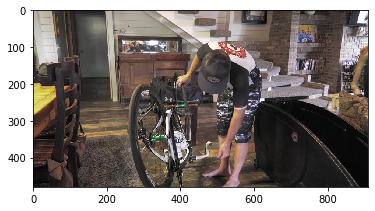

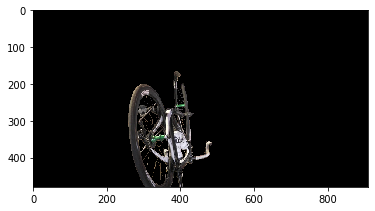

In [6]:
b_i = 0 # np.random.choice(targets.shape[0], 1)[0]
n_i = 0

to_show = frames[b_i,0].numpy().transpose(1,2,0)
plt.imshow(to_show)

to_show = targets[b_i,n_i].numpy().transpose(1,2,0)
plt.figure()
plt.imshow(to_show)

### Check extract_targets

In [7]:
ex_targets = extract_targets(targets, masks[:,0], n_objects)
print(ex_targets.shape)

torch.Size([1, 2, 3, 394, 232])


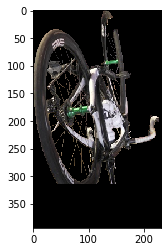

In [8]:
b_i = 0 # np.random.choice(ex_targets.shape[0], 1)[0]
n_i = 0

to_show = ex_targets[b_i, n_i].numpy().transpose(1,2,0)
plt.imshow(to_show)